# Algerain Forest Fire


- Machine Learning LifeCycle
    1. Data Ingestion
    2. EDA 
    3. Preprocessing
    4. Model Building
    5. Performance Metrics
    
    

- Problem Statement
    
       - The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
        122 instances for each region.
        The period from June 2012 to September 2012.
        The dataset includes 11 attribues and 1 output attribue (class)
        The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.
    
    
- Feature Description
    1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
    2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
    3. RH : Relative Humidity in %: 21 to 90
    4. Ws :Wind speed in km/h: 6 to 29
    5. Rain: total day in mm: 0 to 16.8 FWI Components
    6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    8. Drought Code (DC) index from the FWI system: 7 to 220.4
    9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
    11. Fire Weather Index (FWI) Index: 0 to 31.1
    12. Classes: two classes, namely Fire and not Fire
    
    

- Machine Learning Models Used
    1. Linear Regression
    2. Ridge Regression
    3. Lasso Regression
    4. Elastic-Net Regression

In [300]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [301]:
## importing the Dataset
data=pd.read_csv(r'Algerian_Forest_Fire.csv',header=1)

In [302]:
## There are two regions Algeria and Bejaia in same file it needs to be 
## converted into single dataframe for the anaylsis
data=data.drop([122,123],axis=0)

In [303]:
# Printing the Column Labels in the dataset
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [304]:
## Renaming the Columns which has space in the column labels
data.rename(columns={' RH':'RH','Rain ':'Rain',' Ws':'Ws','Classes  ':'Classes'},inplace=True)

In [305]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [306]:
# Top Five Records in the dataset
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [307]:
# Sample five records in the dataset
data.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
63,03,08,2012,35,63,14,0.3,76.6,5.7,10,1.7,5.5,0.8,not fire
136,13,06,2012,30,52,15,2,72.3,11.4,7.8,1.4,10.9,0.9,not fire
216,01,09,2012,29,86,16,0,37.9,0.9,8.2,0.1,1.4,0,not fire
24,25,06,2012,31,64,15,0,86.7,14.2,63.8,5.7,18.3,8.4,fire
77,17,08,2012,37,52,18,0,89.3,16,100.7,9.7,22.9,14.6,fire


In [308]:
# Checking whether there is any duplicate records in the dataset
data.duplicated().sum()

0

Observation:
    There is no records which is duplicated in the dataset

In [309]:
## Checking the total number of records and columns with the dataset
data.shape

(244, 14)

### Exploratory Data Anaylsis

In [310]:
## Detailed information of each features in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


###### Observation:
    - There are some features which should be converted to int and float type there is some data discriminacy
        in the dataset which need to be preprocessed

In [311]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

###### Observation:
    - There is one record which is null in the feature Classes

In [312]:
## Checking the datatype of FWI feature
data['FWI'].dtype

dtype('O')

In [313]:
## Checking the Shape of FWI feature
data['FWI'].shape

(244,)

### Converting the Feature Datatype

In [314]:
### Rain,FFMC,DMC,DC,ISI,BUI,FWI has object type
float_var=['Rain','FFMC','DMC','DC','ISI','BUI','FWI']

In [315]:
### All the features which are in float_var are converted to float type
for col in float_var:
    data[col] = data[col].apply(pd.to_numeric, downcast='float', errors='coerce')

In [316]:
data.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain           float32
FFMC           float32
DMC            float32
DC             float32
ISI            float32
BUI            float32
FWI            float32
Classes         object
dtype: object

In [317]:
### day,month,year,Temperature,RH,Ws are in object type
num_var=['day','month','year','Temperature','RH','Ws']

In [318]:
### All the features in num_var are converted into int type
for col in num_var:
    data[col]=data[col].astype('int')

In [319]:
data.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float32
FFMC           float32
DMC            float32
DC             float32
ISI            float32
BUI            float32
FWI            float32
Classes         object
dtype: object

In [320]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire


### Statistical Analysis

In [321]:
### Storing All the numerical variable in num_col
num_col=data[data.dtypes[(data.dtypes=='int') | (data.dtypes=='float')|(data.dtypes=='float32')].index]

In [322]:
### Describing the stastical analysis of the data 
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000000,16.000000,23.000000,31.000000
month,244.0,7.500000,1.112961,6.0,7.000000,7.500000,8.000000,9.000000
year,244.0,2012.000000,0.000000,2012.0,2012.000000,2012.000000,2012.000000,2012.000000
Temperature,244.0,32.172131,3.633843,22.0,30.000000,32.000000,35.000000,42.000000
RH,244.0,61.938525,14.884200,21.0,52.000000,63.000000,73.250000,90.000000
Ws,244.0,15.504098,2.810178,6.0,14.000000,15.000000,17.000000,29.000000
Rain,244.0,0.760656,1.999407,0.0,0.000000,0.000000,0.500000,16.799999
FFMC,244.0,77.887680,14.337568,28.6,72.075003,83.500000,88.300003,96.000000
DMC,244.0,14.673360,12.368040,0.7,5.800000,11.300000,20.750000,65.900002
DC,243.0,49.430847,47.665600,6.9,12.350000,33.099998,69.099998,220.399994


###### Observation
    1. Rain Feature is highly skewed on the right 
    2. year feature is not required as it has only one unique value through out the dataset 
    3. Rain Features has some outliers
    4. BUI also right skewed and has some outliers

### Drop the year Feature

In [323]:
### Unique values in the year featue
num_col['year'].unique()

array([2012])

###### Observation:
    - As there is only one year it has been analysed for both the regions 
      it can be dropped from the dataset

In [324]:
### Droping the year feature
num_col.drop(labels=['year'],axis=1,inplace=True)

In [325]:
num_col.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5


### Correlation between the features

In [326]:
num_col.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527952,0.177727,0.517229,0.350781
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.126511,0.061680,0.085822,0.082639
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.566670
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.580957
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.032368
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.324422
FFMC,2.240321e-01,1.557669e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.691132
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.875864
DC,5.279524e-01,1.265111e-01,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,1.777266e-01,6.168012e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.922895


###### Observation:
    - Temperature and Fine Fuel Moisture Code (FFMC) are Positively Correlated .
    - Temperature and Relative Humidity (RH) are Negatively Correlated .
    - Temperature and Initial Spread Index (ISI) are Positively Correlated .
    - Buildup Index (BUI) and Duff Moisture Code (DMC) are highly Correlated but both of them are independent variable 
      which leads to MultiCollinearity Which should be handled
    -  Drought Code (DC) and Buildup Index (BUI) are also highly Correlated they also make MultiCollinearity

In [327]:
### Make a Copy of the DataFrame
df=num_col.copy()

In [328]:
### Appending the Classes feature in df 
df['Classes']=data['Classes']

In [329]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire


In [330]:
### showing the unique values in the Classes feature
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

###### Observation:
    - It seems that there are lot of spacing which should be stripped off.

In [331]:
### Stripping the object on both sides 

for i in df.columns:
    if df[i].dtypes=='O':
        df[i]=df[i].str.strip()

In [332]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

###### Observation:
    - There is some null values in the Classes feature which should be preprocessed

In [333]:
### There are one missing values which can be dropped off
df['Classes'].isnull().sum()

1

In [334]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        1
dtype: int64

In [335]:
df.dropna(inplace=True)

Observation:
     There are some missing values which can be dropped off from the dataframe

In [336]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [337]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

### What is Maximum Temperature When the Fire has happened

In [338]:
df.groupby('Classes')['Temperature'].max()

Classes
fire        42
not fire    39
Name: Temperature, dtype: int32

Observation:
     The maximum temperature was around 42 degree celsius 

##### What was the Average Relative Humidity when the Fire happened where the Temperature was over 38 degree

In [339]:
df[(df['Classes']=='fire') & (df['Temperature']>38)]['RH'].mean()

34.55555555555556

Observation:
    The average Humidity was around 34%

##### Display all Average Temperature of month where the fire had happened

In [340]:
df[df['Classes']=='fire'].groupby(['month'])['Temperature'].mean()

month
6    32.440000
7    33.842105
8    35.647059
9    31.086957
Name: Temperature, dtype: float64

##### Display all the details of the list where the fire has happened with maximum temperature

In [341]:
df[(df['Classes']=='fire') & (df['Temperature']==max(df['Temperature']))]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
201,17,8,42,24,9,0.0,96.0,30.299999,76.400002,15.7,30.4,24.0,fire


##### Display the Average Realtive Humidity for each month where temperature was more than 38 degree

In [342]:
df[df['Temperature']>38].groupby('month')['RH'].mean()

month
7    54.50
8    33.25
Name: RH, dtype: float64

##### Display the skewness of the dataset

In [343]:
df.skew()

day            0.000365
month         -0.005207
Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
dtype: float64

Observation:
    It seems that the rain is highly positive skewed has more outliers

##### What is the Ram Space used by the dataset

In [344]:
df.memory_usage()

Index          1944
day             972
month           972
Temperature     972
RH              972
Ws              972
Rain            972
FFMC            972
DMC             972
DC              972
ISI             972
BUI             972
FWI             972
Classes        1944
dtype: int64

##### What is the Temperature when Fire Weather Index was maximum

In [345]:
df[df['FWI']==max(df['FWI'])]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
209,25,8,34,40,18,0.0,92.099998,56.299999,157.5,14.3,59.5,31.1,fire


##### What is the Temperature when Fine Fuel Moisture Code was maximum

In [346]:
df[df['FFMC']==max(df['FFMC'])]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
201,17,8,42,24,9,0.0,96.0,30.299999,76.400002,15.7,30.4,24.0,fire


##### Covariance between Dependent and Independent Features

In [347]:
df.cov()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,78.190729,-0.003639,3.119138,-9.969476,1.188603,-1.993174,28.544042,53.863133,222.524339,6.632060,65.061368,23.079143
month,-0.003639,1.242764,-0.229653,-0.681903,-0.124987,0.077762,0.272433,0.938676,6.722457,0.303838,1.349400,0.685464
Temperature,3.119138,-0.229653,13.162670,-35.043482,-2.901949,-2.372850,35.222858,21.837668,65.071727,9.101371,23.734918,15.297068
RH,-9.969476,-0.681903,-35.043482,219.874333,10.173809,6.604836,-137.215386,-75.071928,-160.400449,-42.298446,-74.653741,-64.096917
Ws,1.188603,-0.124987,-2.901949,10.173809,7.903887,0.965886,-6.718952,-0.025120,10.604530,0.099643,1.257586,0.677079
Rain,-1.993174,0.077762,-2.372850,6.604836,0.965886,4.012837,-15.634746,-7.169025,-28.456455,-2.891688,-8.546509,-4.835502
FFMC,28.544042,0.272433,35.222858,-137.215386,-6.718952,-15.634746,205.912202,107.342971,347.051365,44.113113,120.872509,73.791798
DMC,53.863133,0.938676,21.837668,-75.071928,-0.025120,-7.169025,107.342971,153.587434,517.427748,35.032228,173.203205,80.764530
DC,222.524339,6.722457,65.071727,-160.400449,10.604530,-28.456455,347.051365,517.427748,2272.009991,100.718521,638.862527,262.277744
ISI,6.632060,0.303838,9.101371,-42.298446,0.099643,-2.891688,44.113113,35.032228,100.718521,17.257659,38.071147,28.526551


In [348]:
### Finding the outliers in the dataset
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lowerbound=q1-1.5*IQR
    upperbound=q3+1.5*IQR
    return lowerbound,upperbound

##### Display all the Skewed data of Rain 

In [349]:
lowerfence,upperfence=find_outliers_IQR(df['Rain'])

In [350]:
print("The Lower Bound is",lowerfence,"\n"+"The Upper Bound is ",upperfence)

The Lower Bound is -0.75 
The Upper Bound is  1.25


In [351]:
len(df[(df['Rain']<lowerfence)|(df['Rain']>upperfence)])

35

Observation:
    There are 35 records in Rain which is skewed and has outliers which should be processed

##### Display all the Skewed data of Duff Moisture Code

In [352]:
lowerfence,upperfence=find_outliers_IQR(df['DMC'])

In [353]:
print("The Lower Bound is",lowerfence,"\n"+"The Upper Bound is ",upperfence)

The Lower Bound is -16.699999809265137 
The Upper Bound is  43.30000019073486


In [354]:
len(df[(df['DMC']<lowerfence)|(df['DMC']>upperfence)])

12

Observation:
    There are 12 records in Duff Moisture Code which is skewed and has outliers which should be processed

### Graph Analysis

In [355]:
graph_col=['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']

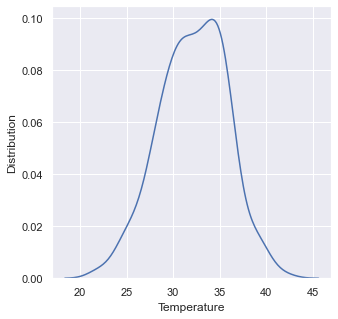

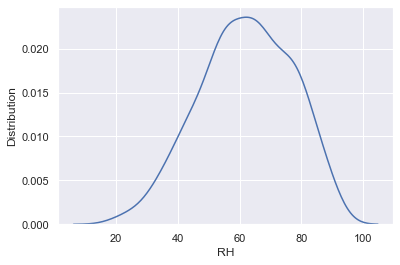

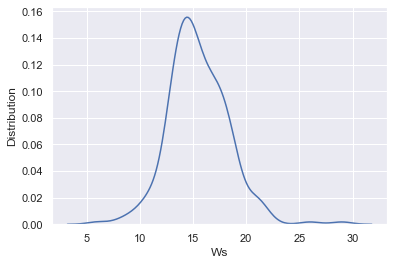

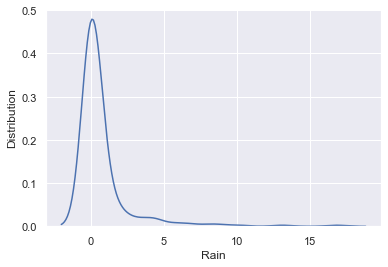

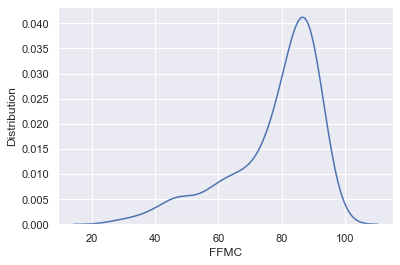

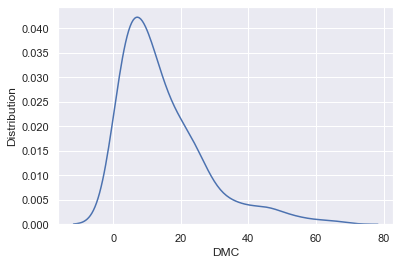

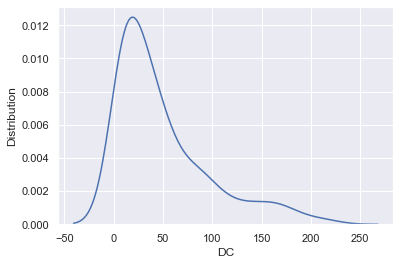

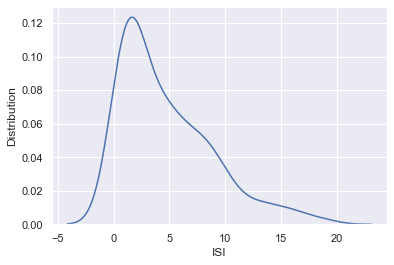

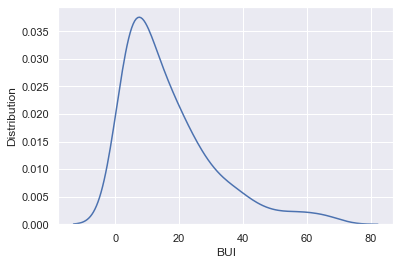

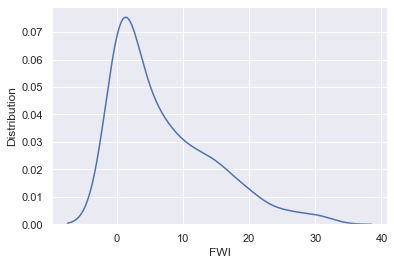

In [356]:
### Plotting the Kde Plot to check the distribution of the feature
fig, ax = plt.subplots(figsize=(5, 5))
for i in graph_col:
    sns.kdeplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Distribution')
    plt.show()

###### Observation:
    1. Temperature is Normally Distributed.
    2. Relative Humidity is slightly skewed right side.
    3. Wind Speed is Right Skewed.
    4. Rain is log normally ditributed right skewed.
    5. Fine Fuel Moisture Code is left skewed.
    6. Duff Moisture Code (DMC),Drought Code (DC) ,Initial Spread Index (ISI),Buildup Index (BUI) ,Fire Weather Index (FWI)
       are slightly right skewed.

### Display the Temperature when Fire has happened

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

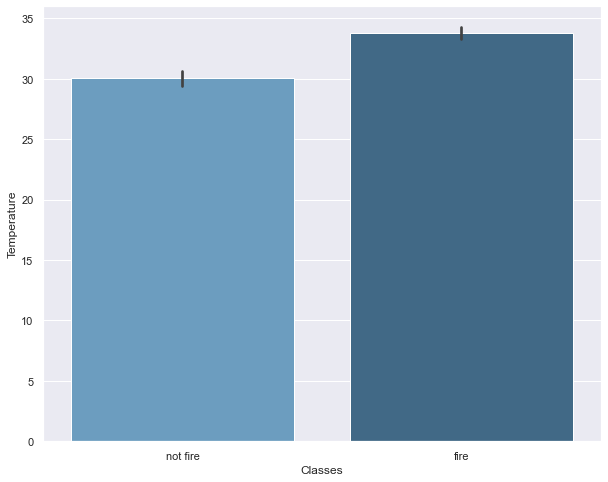

In [357]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Classes',y='Temperature',data=df,palette="Blues_d")

###### Observation:
    - The Average temperature was around 33 Celsius degrees when fire has happened

### Display the Distribution of Rain vs Temperature

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

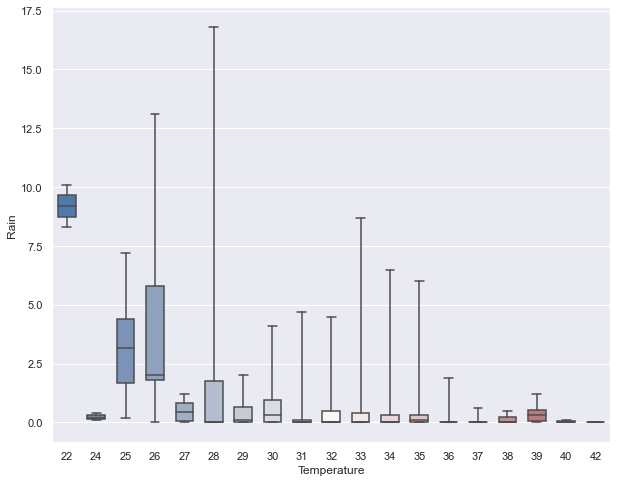

In [358]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="Temperature", y="Rain", data=df,
            whis=[0, 100], width=.6, palette="vlag")


###### Observation:
    - During 28 Celsius degrees has maximum rainfall
    - Temperature is inversely correlated with rain

### Show the Relation between Temperature and Fine Fuel Moisture Code With Respect to Classes

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

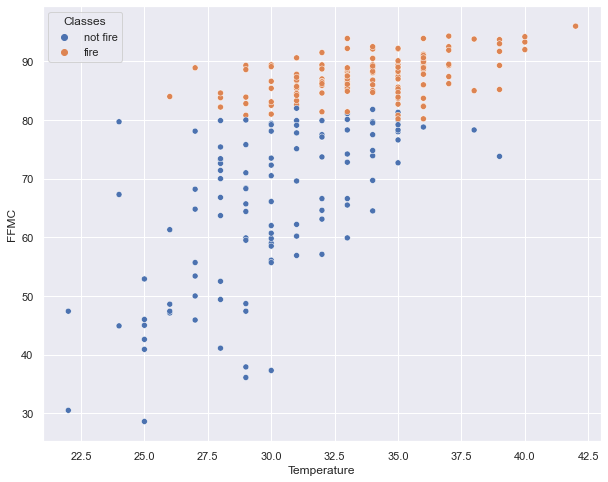

In [359]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Temperature',y='FFMC',hue='Classes',data=df)

###### Observation:
    - Temperature and Fine Fuel Moisture Code are linearly increasing it is highly correlated
    - The Temperature and FFMC are High when Fire has happened

### Show the relation between Temperature and Initial Spread Index

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

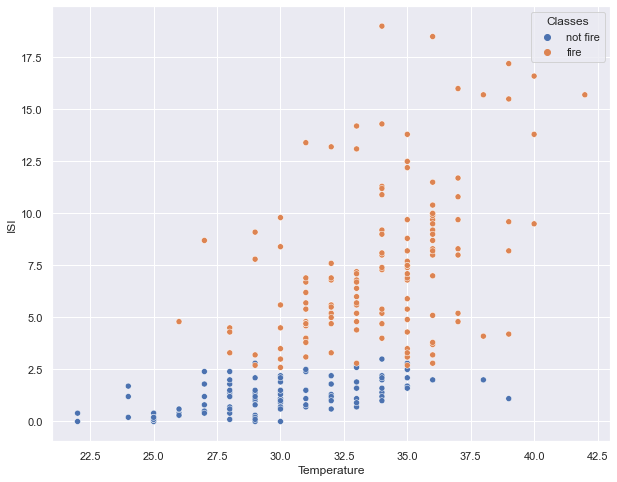

In [360]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Temperature',y='ISI',hue='Classes',data=df)

###### Observation:
    - Temperature and Initial Spread Index are linearly increasing it is highly correlated
    - The Temperature and ISI are High when Fire has happened

### MultiCollinearity

<AxesSubplot:xlabel='DMC', ylabel='BUI'>

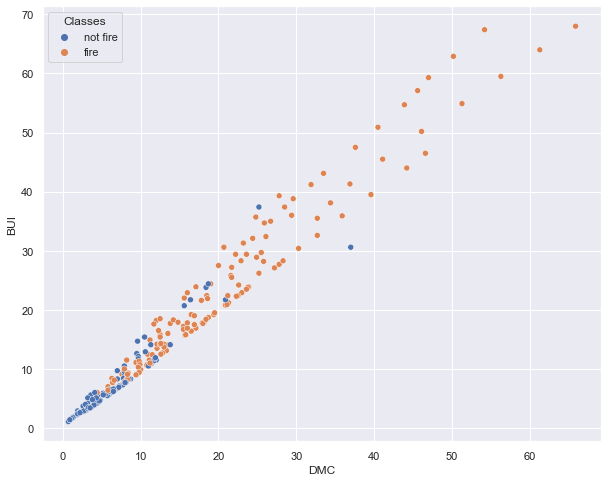

In [361]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='DMC',y='BUI',hue='Classes',data=df)

###### Observation:
    - Duff Moisture Code and Buildup Index are two independent varaibles which are highly correlated.
    - Either one of the feature should be dropped for the feature selection.

### Show the relation between Temperature and Relative Humidity

<AxesSubplot:xlabel='Temperature', ylabel='RH'>

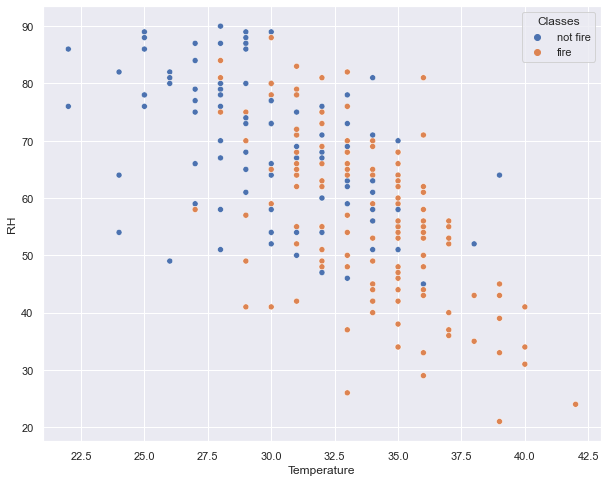

In [362]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Temperature',y='RH',hue='Classes',data=df)

###### Observation:
    - Temperature and Relative Humidity are negative Correlated
    - Rumidity is less when the fire has happened but the temperature was large

<AxesSubplot:xlabel='month', ylabel='Temperature'>

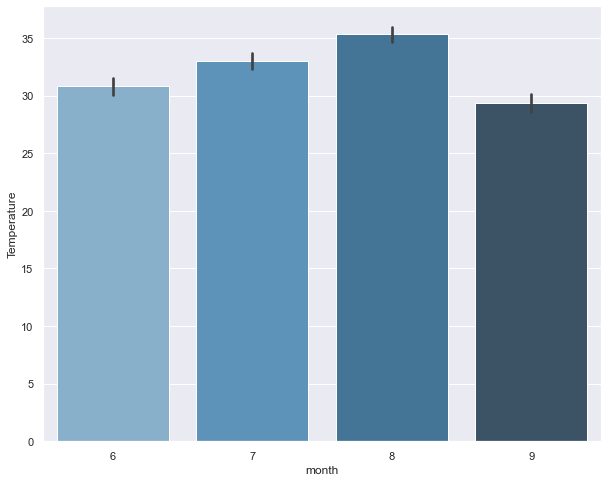

In [363]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='month',y='Temperature',data=df,palette="Blues_d")

In [ ]:
sns.pairplot(df)

### Display the Correlation Between the Features Ghapically

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(),annot=True)

###### Observation:
    - As Duff Moisture Code and Buildup Index are highly correlated
      there should be one feature since Duff Moisture Code is higly correlated with
      Temperature feature we can drop the Buildup Index

In [ ]:
df.drop(labels=['BUI'],axis=1,inplace=True)

In [ ]:
df.head()

### Label Encoding

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Classes'.
df['Classes']= label_encoder.fit_transform(df['Classes'])
  
df['Classes'].unique()

In [ ]:
df.head()

###### Observation:
    -It changes all the Classes feature which has not fire to 1 and fire to 0

### How Linearly The Temperature and Fine Fuel Moisture Code are Related

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
sns.regplot(x='FFMC',y='Temperature',data=df)

### How Linearly The Temperature and Relative Humidity are Related

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
sns.regplot(x='RH',y='Temperature',data=df)

### How Linearly The Temperature and Initial Spread Index are Related

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.regplot(x='ISI',y='Temperature',data=df)

In [ ]:
sample_temp=df['Temperature']

In [ ]:
df.drop(labels=['Temperature'],axis=1,inplace=True)

In [ ]:
df['Temperature']=sample_temp

In [ ]:
df.head()

## Dependent and Independent Features

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
df['Classes'].unique()

In [ ]:
X.head()

In [ ]:
y.head()

### Splitting the Dataset to Train and Test Feature

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=11)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
print("X_train shape is ",X_train.shape)
print("y_train shape is ",y_train.shape)

In [ ]:
print("X_test shape is ",X_test.shape)
print("y_test shape is ",y_test.shape)

## Standardizing the Independent Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
regression=LinearRegression()

In [ ]:
regression

In [ ]:
regression.fit(X_train,y_train)

In [ ]:
## Print the Coefficients and the intercept
print(regression.coef_)

In [ ]:
print(regression.intercept_)

In [ ]:
## Prediction for the test data
regression_pred=regression.predict(X_test)

In [ ]:
regression_pred

### Assumptions of Linear Regression

In [ ]:
plt.scatter(y_test,regression_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted data")
plt.show()

In [ ]:
residuals=y_test-regression_pred

In [ ]:
residuals.head()

In [ ]:
sns.displot(residuals,kind='kde')

In [ ]:
plt.scatter(regression_pred,residuals)

### Calculating the Error

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("The Mean Squared Error for the model is",mean_squared_error(y_test,regression_pred))
print("The Mean Absolute Error for the model is",mean_absolute_error(y_test,regression_pred))
print("The Root Mean Squared Error for the model is",np.sqrt(mean_squared_error(y_test,regression_pred)))

### Performance Metrics of the Model

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_pred)
print("The R2 Score for the model builded is",score)

In [ ]:
## Adjusted R square
Adjusted_r=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R Square for the model is",Adjusted_r)

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [ ]:
ridge.fit(X_train,y_train)

In [ ]:
ridge_pred=ridge.predict(X_test)

In [ ]:
ridge_pred

In [ ]:
residual=ridge_pred-y_test

In [ ]:
sns.displot(residual,kind='kde')

In [ ]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted data")
plt.show()

### Calculating the Error

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("The Mean Squared Error for the model is",mean_squared_error(y_test,ridge_pred))
print("The Mean Absolute Error for the model is",mean_absolute_error(y_test,ridge_pred))
print("The Root Mean Squared Error for the model is",np.sqrt(mean_squared_error(y_test,ridge_pred)))

### Performance Metrics

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print("The R2 Score for the model builded is",score)

In [ ]:
## Adjusted R square
Adjusted_r=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R Square for the model is",Adjusted_r)

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [ ]:
lasso.fit(X_train,y_train)

In [ ]:
lasso_pred=lasso.predict(X_test)

In [ ]:
lasso_pred

In [ ]:
residual=lasso_pred-y_test

In [ ]:
sns.displot(residual,kind='kde')

### Calculation the Error

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("The Mean Squared Error for the model is",mean_squared_error(y_test,lasso_pred))
print("The Mean Absolute Error for the model is",mean_absolute_error(y_test,lasso_pred))
print("The Root Mean Squared Error for the model is",np.sqrt(mean_squared_error(y_test,lasso_pred)))

### Performance Metrics

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print("The R2 Score for the model builded is",score)

In [ ]:
## Adjusted R square
Adjusted_r=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R Square for the model is",Adjusted_r)

### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet(random_state=0)

In [ ]:
elastic.fit(X_train,y_train)

In [ ]:
elastic_pred=elastic.predict(X_test)

In [ ]:
elastic_pred

In [ ]:
residual=elastic_pred-y_test

In [ ]:
residual

In [ ]:
sns.displot(residual,kind='kde')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("The Mean Squared Error for the model is",mean_squared_error(y_test,elastic_pred))
print("The Mean Absolute Error for the model is",mean_absolute_error(y_test,elastic_pred))
print("The Root Mean Squared Error for the model is",np.sqrt(mean_squared_error(y_test,elastic_pred)))

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,elastic_pred)
print("The R2 Score for the model builded is",score)

In [ ]:
## Adjusted R square
Adjusted_r=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R Square for the model is",Adjusted_r)